# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 일식음식점

In [10]:
# 일식음식점만 남기기
ap_ilsik = df_ap_quarter[df_ap_quarter.업종명 == '일식음식점'].reset_index().drop('index', axis=1)
ap_ilsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,일식음식점,압구정동,8681408471,97,8,1
1,2017-2,외식,식사류,일식음식점,압구정동,8174889041,101,8,4
2,2017-3,외식,식사류,일식음식점,압구정동,8199879740,102,9,8
3,2017-4,외식,식사류,일식음식점,압구정동,8755332031,101,6,7
4,2018-1,외식,식사류,일식음식점,압구정동,8389539423,104,8,5
5,2018-2,외식,식사류,일식음식점,압구정동,8585574566,107,3,0
6,2018-3,외식,식사류,일식음식점,압구정동,8004013130,107,4,4
7,2018-4,외식,식사류,일식음식점,압구정동,14612509757,112,8,3
8,2019-1,외식,식사류,일식음식점,압구정동,6957889879,116,7,3
9,2019-2,외식,식사류,일식음식점,압구정동,6034653304,119,8,5


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_ilsik['성장성'] = ap_ilsik['분기당_매출_금액'] / ap_ilsik['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_ilsik['성장성'][0] = 1

ap_ilsik

<ipython-input-11-3211fc1555af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_ilsik['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,식사류,일식음식점,압구정동,8681408471,97,8,1,1.000000
1,2017-2,외식,식사류,일식음식점,압구정동,8174889041,101,8,4,0.941655
2,2017-3,외식,식사류,일식음식점,압구정동,8199879740,102,9,8,1.003057
3,2017-4,외식,식사류,일식음식점,압구정동,8755332031,101,6,7,1.067739
4,2018-1,외식,식사류,일식음식점,압구정동,8389539423,104,8,5,0.958221
5,2018-2,외식,식사류,일식음식점,압구정동,8585574566,107,3,0,1.023367
6,2018-3,외식,식사류,일식음식점,압구정동,8004013130,107,4,4,0.932263
7,2018-4,외식,식사류,일식음식점,압구정동,14612509757,112,8,3,1.825648
8,2019-1,외식,식사류,일식음식점,압구정동,6957889879,116,7,3,0.476160
9,2019-2,외식,식사류,일식음식점,압구정동,6034653304,119,8,5,0.867311


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_ilsik['개업률'] = (ap_ilsik['개업점포수'] / ap_ilsik['총 점포수']) * 100
ap_ilsik['폐업률'] = (ap_ilsik['폐업점포수'] / ap_ilsik['총 점포수']) * 100
ap_ilsik['순점포증감률'] = ((ap_ilsik['개업점포수'] - ap_ilsik['폐업점포수']) / ap_ilsik['총 점포수']) * 100

ap_ilsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,외식,식사류,일식음식점,압구정동,8681408471,97,8,1,1.000000,8.247423,1.030928,7.216495
1,2017-2,외식,식사류,일식음식점,압구정동,8174889041,101,8,4,0.941655,7.920792,3.960396,3.960396
2,2017-3,외식,식사류,일식음식점,압구정동,8199879740,102,9,8,1.003057,8.823529,7.843137,0.980392
3,2017-4,외식,식사류,일식음식점,압구정동,8755332031,101,6,7,1.067739,5.940594,6.930693,-0.990099
4,2018-1,외식,식사류,일식음식점,압구정동,8389539423,104,8,5,0.958221,7.692308,4.807692,2.884615
5,2018-2,외식,식사류,일식음식점,압구정동,8585574566,107,3,0,1.023367,2.803738,0.000000,2.803738
6,2018-3,외식,식사류,일식음식점,압구정동,8004013130,107,4,4,0.932263,3.738318,3.738318,0.000000
7,2018-4,외식,식사류,일식음식점,압구정동,14612509757,112,8,3,1.825648,7.142857,2.678571,4.464286
8,2019-1,외식,식사류,일식음식점,압구정동,6957889879,116,7,3,0.476160,6.034483,2.586207,3.448276
9,2019-2,외식,식사류,일식음식점,압구정동,6034653304,119,8,5,0.867311,6.722689,4.201681,2.521008


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 일식음식점만 남기기
gangnam_ilsik = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '일식음식점'].reset_index()

################################################################################################################################################################################################

ap_ilsik['시장성'] = (ap_ilsik['분기당_매출_금액'] / ap_ilsik['총 점포수']) - (gangnam_ilsik['분기당_매출_금액'] / gangnam_ilsik['총 점포수'])

ap_ilsik = ap_ilsik[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_ilsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일식음식점,8681408471,1.000000,7.216495,-1.850395e+06
1,2017-2,일식음식점,8174889041,0.941655,3.960396,-5.865219e+06
2,2017-3,일식음식점,8199879740,1.003057,0.980392,-7.460785e+06
3,2017-4,일식음식점,8755332031,1.067739,-0.990099,-6.493758e+06
4,2018-1,일식음식점,8389539423,0.958221,2.884615,-9.263533e+06
5,2018-2,일식음식점,8585574566,1.023367,2.803738,-1.067136e+07
6,2018-3,일식음식점,8004013130,0.932263,0.000000,-1.281395e+07
7,2018-4,일식음식점,14612509757,1.825648,4.464286,9.582065e+04
8,2019-1,일식음식점,6957889879,0.476160,3.448276,-1.164273e+07
9,2019-2,일식음식점,6034653304,0.867311,2.521008,-1.496563e+07


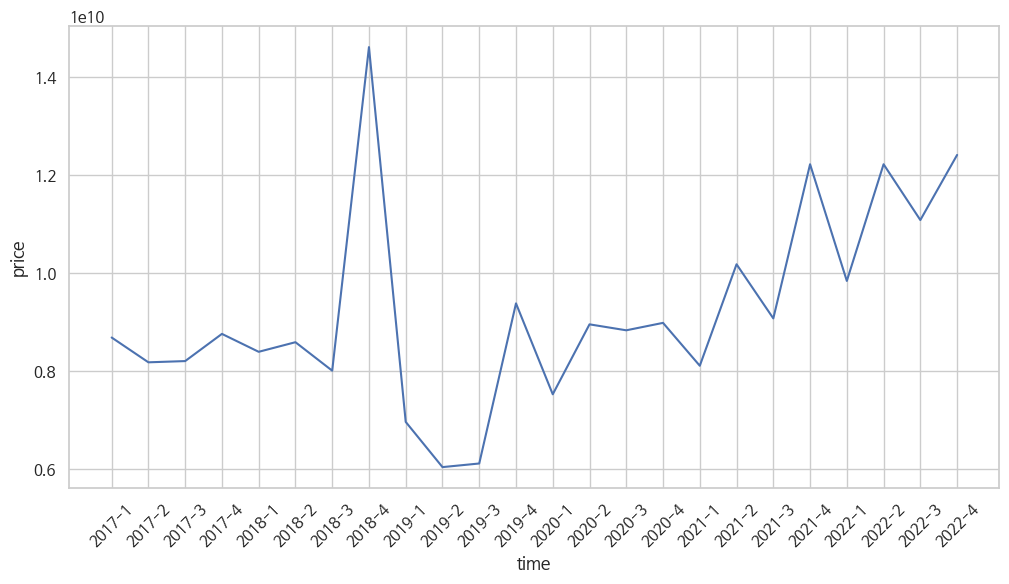

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_ilsik['분기'], y=ap_ilsik['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_ilsik[['성장성', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.850395e+06  7.216495
1   0.941655 -5.865219e+06  3.960396
2   1.003057 -7.460785e+06  0.980392
3   1.067739 -6.493758e+06 -0.990099
4   0.958221 -9.263533e+06  2.884615
5   1.023367 -1.067136e+07  2.803738
6   0.932263 -1.281395e+07  0.000000
7   1.825648  9.582065e+04  4.464286
8   0.476160 -1.164273e+07  3.448276
9   0.867311 -1.496563e+07  2.521008
10  1.012222 -1.790233e+07  0.000000
11  1.535344 -1.494556e+06 -3.539823
12  0.802024 -5.389898e+06 -2.727273
13  1.189919  1.718173e+06 -0.917431
14  0.986409  4.695116e+06 -2.830189
15  1.017173  1.288684e+06  7.826087
16  0.902482 -2.589373e+06  0.869565
17  1.255753  6.146144e+05  5.737705
18  0.891367  3.811884e+06  1.612903
19  1.347042  7.259950e+04  5.343511
20  0.805003 -2.968533e+06  2.962963
21  1.242242 -5.145916e+06  2.173913
22  0.906740 -9.299320e+06  1.428571
23  1.119997 -8.591352e+06  0.000000
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.31906892 0.38070726 0.43713125]
 [0.47709764 0.41203681 0.31144211]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1679
Epoch 1: val_loss improved from inf to 0.19227, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.1679 - val_loss: 0.1923
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1672
Epoch 2: val_loss improved from 0.19227 to 0.19124, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1672 - val_loss: 0.1912
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1665
Epoch 3: val_loss improved from 0.19124 to 0.19021, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1665 - val_loss: 0.1902
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1658
Epoch 4: val_loss improved from 0.19021 to 0.18919, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1658 - val_loss: 0.1892
Epoch 5/300
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 623ms/step
[[0.2821954 ]
 [0.314965  ]
 [0.26850265]
 [0.26932353]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.443289,0.282195
2022-2,0.721093,0.314965
2022-3,0.588234,0.268503
2022-4,0.743240,0.269324


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_ilsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.443289,0.282195,9837120319,8.455285e+09,1.381836e+09
2022-2,0.721093,0.314965,12220088362,8.736378e+09,3.483711e+09
2022-3,0.588234,0.268503,11080437007,8.337830e+09,2.742607e+09
2022-4,0.743240,0.269324,12410060546,8.344872e+09,4.065189e+09


In [26]:
df_test = df_test.reset_index()

### 결과

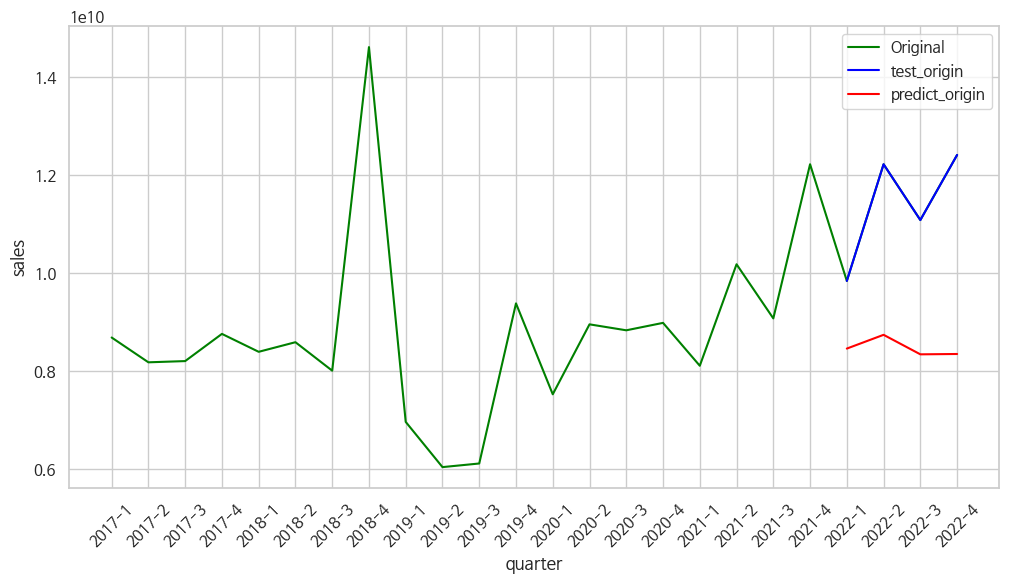

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.918335e+09
std      1.158538e+09
min      1.381836e+09
25%      2.402414e+09
50%      3.113159e+09
75%      3.629080e+09
max      4.065189e+09
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 19ms/step
[[0.24123108]]
--------------------------------------------------------------------------------
예측된 매출  : 8103898624.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0    8681408471 -1.850395e+06  7.216495
1    8174889041 -5.865219e+06  3.960396
2    8199879740 -7.460785e+06  0.980392
3    8755332031 -6.493758e+06 -0.990099
4    8389539423 -9.263533e+06  2.884615
5    8585574566 -1.067136e+07  2.803738
6    8004013130 -1.281395e+07  0.000000
7   14612509757  9.582065e+04  4.464286
8    6957889879 -1.164273e+07  3.448276
9    6034653304 -1.496563e+07  2.521008
10   6108408160 -1.790233e+07  0.000000
11   9378510141 -1.494556e+06 -3.539823
12   7521787123 -5.389898e+06 -2.727273
13   8950320371  1.718173e+06 -0.917431
14   8828672849  4.695116e+06 -2.830189
15   8980287011  1.288684e+06  7.826087
16   8104547561 -2.589373e+06  0.869565
17  10177310794  6.146144e+05  5.737705
18   9071716594  3.811884e+06  1.612903
19  12219980371  7.259950e+04  5.343511
20   9837120319 -2.968533e+06  2.962963
21  12220088362 -5.145916e+06  2.173913
22  11080437007 -9.299320e+06  1.428571
23  12410060546 -8.591352e+06  0.000000


In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.58823364 0.38070726 0.43713125]
 [0.74324014 0.41203681 0.31144211]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2800
Epoch 1: val_loss improved from inf to 0.22985, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2800 - val_loss: 0.2298
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2790
Epoch 2: val_loss improved from 0.22985 to 0.22876, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2790 - val_loss: 0.2288
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2780
Epoch 3: val_loss improved from 0.22876 to 0.22768, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2780 - val_loss: 0.2277
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2770
Epoch 4: val_loss improved from 0.22768 to 0.22660, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2770 - val_loss: 0.2266
Epoch 5/300
1/1 [=================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 646ms/step
[[0.45829305]
 [0.511219  ]
 [0.4397475 ]
 [0.4207303 ]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.243680,0.458293
2022-2,0.567684,0.511219
2022-3,0.319069,0.439748
2022-4,0.477098,0.420730


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 3].values       # 성장성이 ap_ilsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.243680,0.458293,0.805003,1.094621,-0.289618
2022-2,0.567684,0.511219,1.242242,1.166044,0.076199
2022-3,0.319069,0.439748,0.906740,1.069594,-0.162854
2022-4,0.477098,0.420730,1.119997,1.043930,0.076067


### 결과

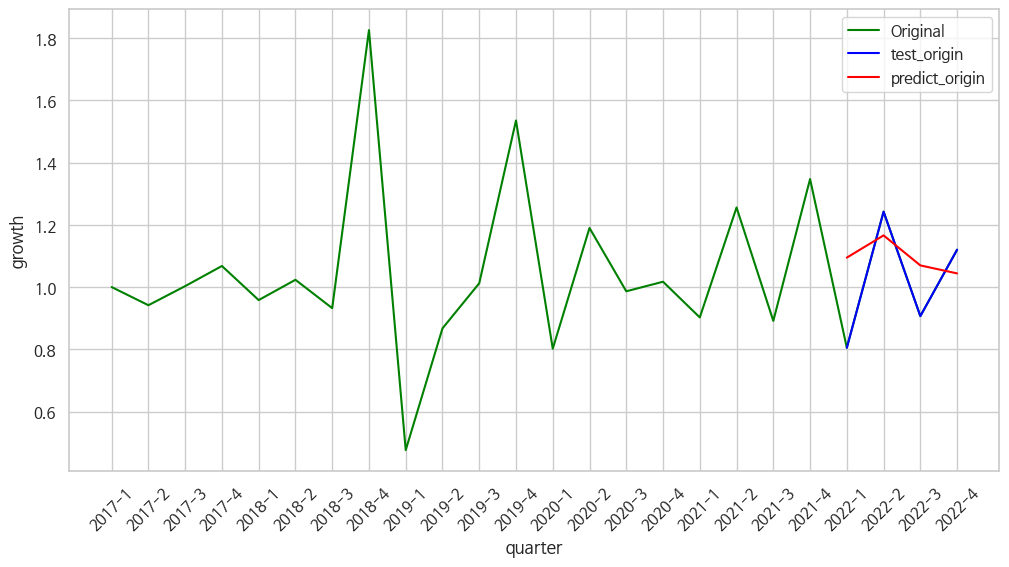

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.075052
std      0.182082
min     -0.289618
25%     -0.194545
50%     -0.043394
75%      0.076100
max      0.076199
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.38167277]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.991222620010376 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_ilsik[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_ilsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000   8681408471  7.216495
1   0.941655   8174889041  3.960396
2   1.003057   8199879740  0.980392
3   1.067739   8755332031 -0.990099
4   0.958221   8389539423  2.884615
5   1.023367   8585574566  2.803738
6   0.932263   8004013130  0.000000
7   1.825648  14612509757  4.464286
8   0.476160   6957889879  3.448276
9   0.867311   6034653304  2.521008
10  1.012222   6108408160  0.000000
11  1.535344   9378510141 -3.539823
12  0.802024   7521787123 -2.727273
13  1.189919   8950320371 -0.917431
14  0.986409   8828672849 -2.830189
15  1.017173   8980287011  7.826087
16  0.902482   8104547561  0.869565
17  1.255753  10177310794  5.737705
18  0.891367   9071716594  1.612903
19  1.347042  12219980371  5.343511
20  0.805003   9837120319  2.962963
21  1.242242  12220088362  2.173913
22  0.906740  11080437007  1.428571
23  1.119997  12410060546  0.000000
--------------------------------------------------------------------------------
             시장성
0 

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.31906892 0.58823364 0.43713125]
 [0.47709764 0.74324014 0.31144211]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2167
Epoch 1: val_loss improved from inf to 0.71399, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2167 - val_loss: 0.7140
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2159
Epoch 2: val_loss improved from 0.71399 to 0.71229, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2159 - val_loss: 0.7123
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2150
Epoch 3: val_loss improved from 0.71229 to 0.71059, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.2150 - val_loss: 0.7106
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2141
Epoch 4: val_loss improved from 0.71059 to 0.70889, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.2141 - val_loss: 0.7089
Epoch 5/300
1/1 [===============

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 694ms/step
[[0.3741639 ]
 [0.43052763]
 [0.36006933]
 [0.36535043]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.660862,0.374164
2022-2,0.564507,0.430528
2022-3,0.380707,0.360069
2022-4,0.412037,0.365350


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 5].values       # 시장성이 ap_ilsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.660862,0.374164,-2.968533e+06,-9447183.0,6.478650e+06
2022-2,0.564507,0.430528,-5.145916e+06,-8173506.5,3.027591e+06
2022-3,0.380707,0.360069,-9.299320e+06,-9765684.0,4.663643e+05
2022-4,0.412037,0.365350,-8.591352e+06,-9646345.0,1.054993e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


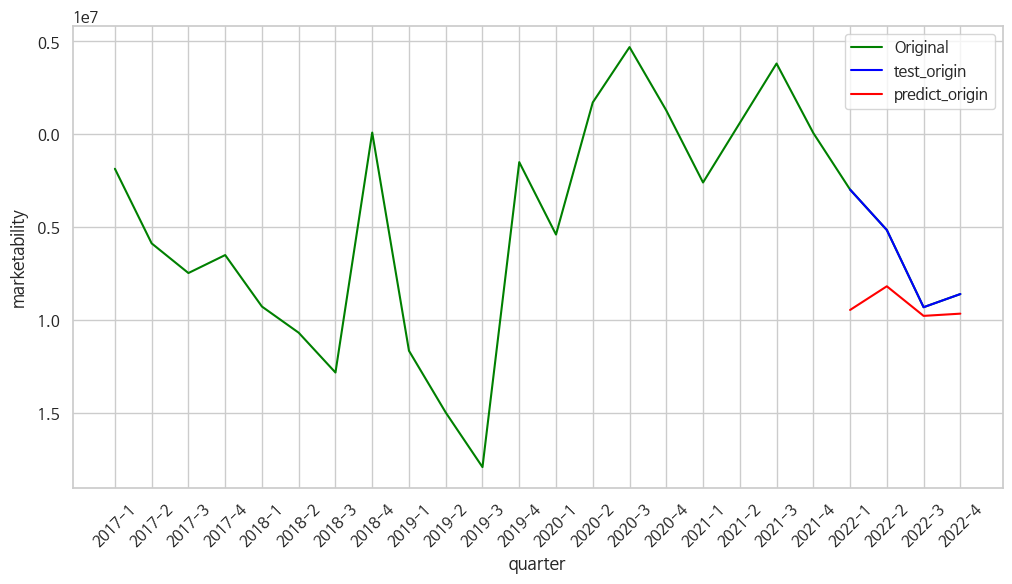

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.756900e+06
std      2.712179e+06
min      4.663643e+05
25%      9.078360e+05
50%      2.041292e+06
75%      3.890356e+06
max      6.478650e+06
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.32467756]]
--------------------------------------------------------------------------------
예측된 시장성  : -10565448.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_ilsik[['성장성', '분기당_매출_금액', '시장성']]
y = ap_ilsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000   8681408471 -1.850395e+06
1   0.941655   8174889041 -5.865219e+06
2   1.003057   8199879740 -7.460785e+06
3   1.067739   8755332031 -6.493758e+06
4   0.958221   8389539423 -9.263533e+06
5   1.023367   8585574566 -1.067136e+07
6   0.932263   8004013130 -1.281395e+07
7   1.825648  14612509757  9.582065e+04
8   0.476160   6957889879 -1.164273e+07
9   0.867311   6034653304 -1.496563e+07
10  1.012222   6108408160 -1.790233e+07
11  1.535344   9378510141 -1.494556e+06
12  0.802024   7521787123 -5.389898e+06
13  1.189919   8950320371  1.718173e+06
14  0.986409   8828672849  4.695116e+06
15  1.017173   8980287011  1.288684e+06
16  0.902482   8104547561 -2.589373e+06
17  1.255753  10177310794  6.146144e+05
18  0.891367   9071716594  3.811884e+06
19  1.347042  12219980371  7.259950e+04
20  0.805003   9837120319 -2.968533e+06
21  1.242242  12220088362 -5.145916e+06
22  0.906740  11080437007 -9.299320e+06
23  1.119997  12410060546 -8.591352e+06


In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.31906892 0.58823364 0.38070726]
 [0.47709764 0.74324014 0.41203681]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2376
Epoch 1: val_loss improved from inf to 0.35948, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2376 - val_loss: 0.3595
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2366
Epoch 2: val_loss improved from 0.35948 to 0.35820, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2366 - val_loss: 0.3582
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2357
Epoch 3: val_loss improved from 0.35820 to 0.35693, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2357 - val_loss: 0.3569
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2347
Epoch 4: val_loss improved from 0.35693 to 0.35566, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2347 - val_loss: 0.3557
Epoch 5/300
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 634ms/step
[[0.5703651 ]
 [0.5689288 ]
 [0.48003983]
 [0.4953597 ]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.572131,0.570365
2022-2,0.502708,0.568929
2022-3,0.437131,0.480040
2022-4,0.311442,0.495360


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_ilsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.572131,0.570365,2.962963,2.942895,0.020068
2022-2,0.502708,0.568929,2.173913,2.926570,-0.752657
2022-3,0.437131,0.480040,1.428571,1.916267,-0.487695
2022-4,0.311442,0.495360,0.000000,2.090391,-2.090391


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


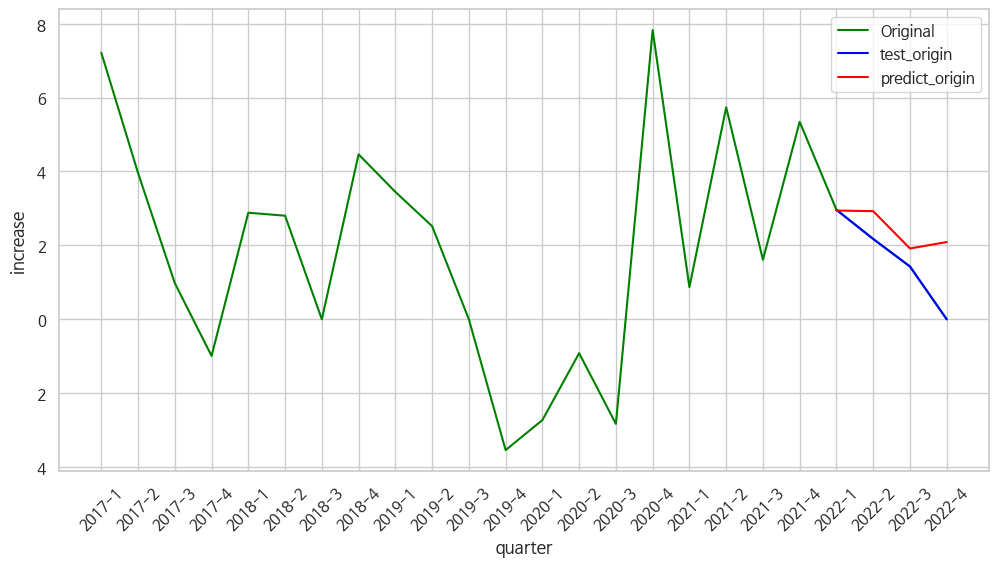

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.827669
std      0.900802
min     -2.090391
25%     -1.087091
50%     -0.620176
75%     -0.360754
max      0.020068
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 20ms/step
[[0.43057588]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.354063630104065 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

8103898600.0
0.9912226
-10565448.0
1.3540636


In [70]:
ap_ilsik.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-70-0d0ee618bbfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_ilsik.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [71]:
ap_ilsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일식음식점,8.681408e+09,1.000000,7.216495,-1.850395e+06
1,2017-2,일식음식점,8.174889e+09,0.941655,3.960396,-5.865219e+06
2,2017-3,일식음식점,8.199880e+09,1.003057,0.980392,-7.460785e+06
3,2017-4,일식음식점,8.755332e+09,1.067739,-0.990099,-6.493758e+06
4,2018-1,일식음식점,8.389539e+09,0.958221,2.884615,-9.263533e+06
5,2018-2,일식음식점,8.585575e+09,1.023367,2.803738,-1.067136e+07
6,2018-3,일식음식점,8.004013e+09,0.932263,0.000000,-1.281395e+07
7,2018-4,일식음식점,1.461251e+10,1.825648,4.464286,9.582065e+04
8,2019-1,일식음식점,6.957890e+09,0.476160,3.448276,-1.164273e+07
9,2019-2,일식음식점,6.034653e+09,0.867311,2.521008,-1.496563e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_ilsik[['성장성', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.850395e+06  7.216495
1   0.941655 -5.865219e+06  3.960396
2   1.003057 -7.460785e+06  0.980392
3   1.067739 -6.493758e+06 -0.990099
4   0.958221 -9.263533e+06  2.884615
5   1.023367 -1.067136e+07  2.803738
6   0.932263 -1.281395e+07  0.000000
7   1.825648  9.582065e+04  4.464286
8   0.476160 -1.164273e+07  3.448276
9   0.867311 -1.496563e+07  2.521008
10  1.012222 -1.790233e+07  0.000000
11  1.535344 -1.494556e+06 -3.539823
12  0.802024 -5.389898e+06 -2.727273
13  1.189919  1.718173e+06 -0.917431
14  0.986409  4.695116e+06 -2.830189
15  1.017173  1.288684e+06  7.826087
16  0.902482 -2.589373e+06  0.869565
17  1.255753  6.146144e+05  5.737705
18  0.891367  3.811884e+06  1.612903
19  1.347042  7.259950e+04  5.343511
20  0.805003 -2.968533e+06  2.962963
21  1.242242 -5.145916e+06  2.173913
22  0.906740 -9.299320e+06  1.428571
23  1.119997 -8.591352e+06  0.000000
24  0.991223 -1.056545e+07  1.354064
--------------------------------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.47709764 0.41203681 0.31144211]
 [0.38167273 0.32467756 0.43057588]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1560
Epoch 1: val_loss improved from inf to 0.21721, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1560 - val_loss: 0.2172
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1553
Epoch 2: val_loss improved from 0.21721 to 0.21605, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1553 - val_loss: 0.2161
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1547
Epoch 3: val_loss improved from 0.21605 to 0.21490, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1547 - val_loss: 0.2149
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1540
Epoch 4: val_loss improved from 0.21490 to 0.21375, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1540 - val_loss: 0.2138
Epoch 5/300
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 651ms/step
[[0.31133363]
 [0.26517507]
 [0.26692724]
 [0.2385982 ]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.721093,0.311334
2022-3,0.588234,0.265175
2022-4,0.743240,0.266927
2023-1,0.241231,0.238598


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_ilsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.721093,0.311334,1.222009e+10,8.705229e+09,3.514860e+09
2022-3,0.588234,0.265175,1.108044e+10,8.309287e+09,2.771150e+09
2022-4,0.743240,0.266927,1.241006e+10,8.324317e+09,4.085744e+09
2023-1,0.241231,0.238598,8.103899e+09,8.081314e+09,2.258432e+07


In [81]:
df_test = df_test.reset_index()

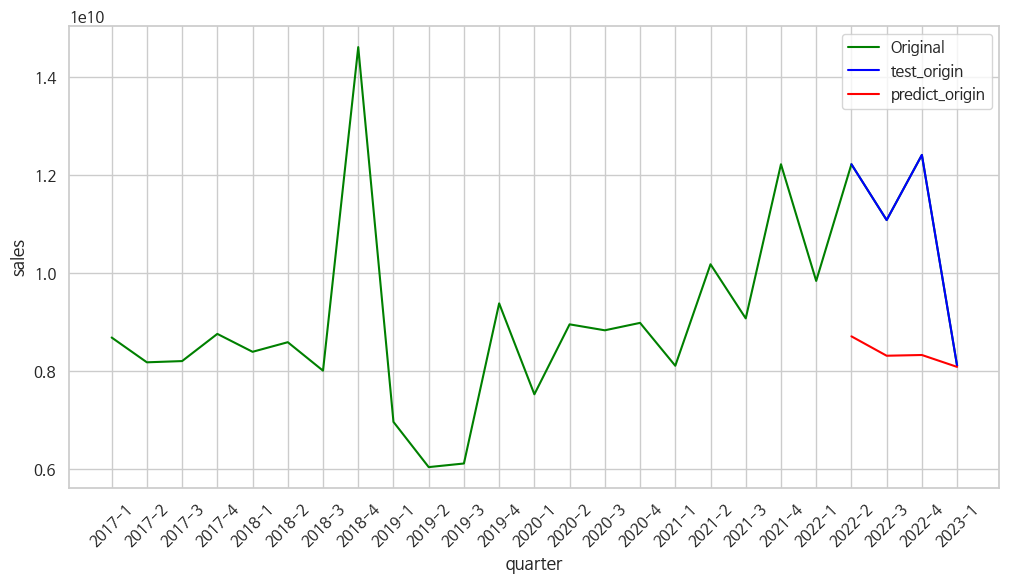

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.598584e+09
std      1.799700e+09
min      2.258432e+07
25%      2.084009e+09
50%      3.143005e+09
75%      3.657581e+09
max      4.085744e+09
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.23979948]]
--------------------------------------------------------------------------------
예측된 매출  : 8091618816.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.681408e+09 -1.850395e+06  7.216495
1   8.174889e+09 -5.865219e+06  3.960396
2   8.199880e+09 -7.460785e+06  0.980392
3   8.755332e+09 -6.493758e+06 -0.990099
4   8.389539e+09 -9.263533e+06  2.884615
5   8.585575e+09 -1.067136e+07  2.803738
6   8.004013e+09 -1.281395e+07  0.000000
7   1.461251e+10  9.582065e+04  4.464286
8   6.957890e+09 -1.164273e+07  3.448276
9   6.034653e+09 -1.496563e+07  2.521008
10  6.108408e+09 -1.790233e+07  0.000000
11  9.378510e+09 -1.494556e+06 -3.539823
12  7.521787e+09 -5.389898e+06 -2.727273
13  8.950320e+09  1.718173e+06 -0.917431
14  8.828673e+09  4.695116e+06 -2.830189
15  8.980287e+09  1.288684e+06  7.826087
16  8.104548e+09 -2.589373e+06  0.869565
17  1.017731e+10  6.146144e+05  5.737705
18  9.071717e+09  3.811884e+06  1.612903
19  1.221998e+10  7.259950e+04  5.343511
20  9.837120e+09 -2.968533e+06  2.962963
21  1.222009e+10 -5.145916e+06  2.173913
22  1.108044e+10 -9.299320e+06  1.428571
23  1.241006e+10

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74324014 0.41203681 0.31144211]
 [0.24123105 0.32467756 0.43057588]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2605
Epoch 1: val_loss improved from inf to 0.23189, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2605 - val_loss: 0.2319
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2596
Epoch 2: val_loss improved from 0.23189 to 0.23075, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2596 - val_loss: 0.2308
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2586
Epoch 3: val_loss improved from 0.23075 to 0.22962, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2586 - val_loss: 0.2296
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2577
Epoch 4: val_loss improved from 0.22962 to 0.22849, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2577 - val_loss: 0.2285
Epoch 5/300
1/1 [=================

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 653ms/step
[[0.5098256 ]
 [0.43836793]
 [0.41947103]
 [0.38042232]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.567684,0.509826
2022-3,0.319069,0.438368
2022-4,0.477098,0.419471
2023-1,0.381673,0.380422


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 3].values       # 성장성이 ap_ilsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.567684,0.509826,1.242242,1.164163,0.078079
2022-3,0.319069,0.438368,0.906740,1.067732,-0.160993
2022-4,0.477098,0.419471,1.119997,1.042231,0.077766
2023-1,0.381673,0.380422,0.991223,0.989535,0.001687


In [94]:
df_test = df_test.reset_index()

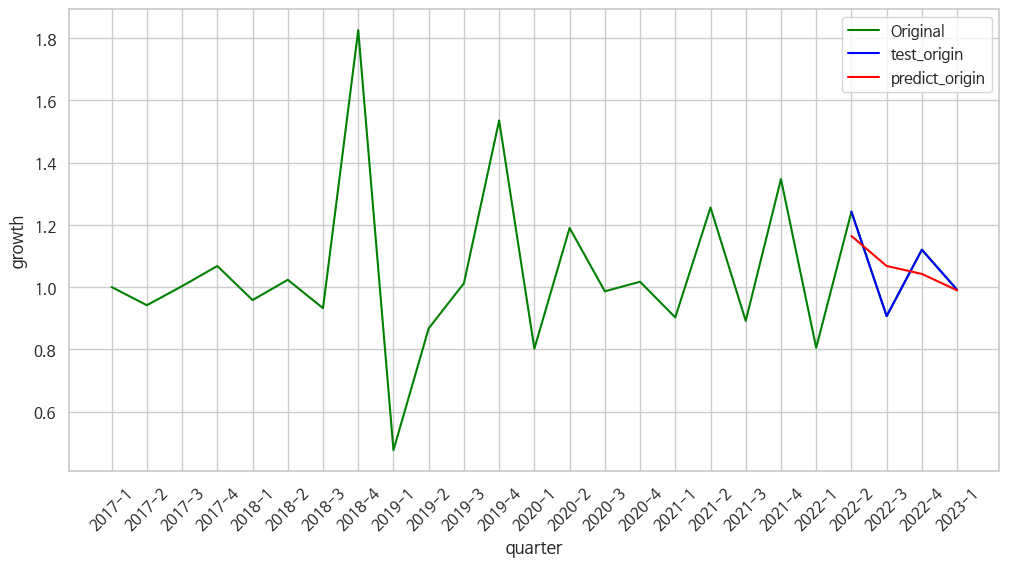

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.000865
std      0.112639
min     -0.160993
25%     -0.038983
50%      0.039727
75%      0.077845
max      0.078079
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.36226654]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9650341868400574 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_ilsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.681408e+09  1.000000  7.216495
1   8.174889e+09  0.941655  3.960396
2   8.199880e+09  1.003057  0.980392
3   8.755332e+09  1.067739 -0.990099
4   8.389539e+09  0.958221  2.884615
5   8.585575e+09  1.023367  2.803738
6   8.004013e+09  0.932263  0.000000
7   1.461251e+10  1.825648  4.464286
8   6.957890e+09  0.476160  3.448276
9   6.034653e+09  0.867311  2.521008
10  6.108408e+09  1.012222  0.000000
11  9.378510e+09  1.535344 -3.539823
12  7.521787e+09  0.802024 -2.727273
13  8.950320e+09  1.189919 -0.917431
14  8.828673e+09  0.986409 -2.830189
15  8.980287e+09  1.017173  7.826087
16  8.104548e+09  0.902482  0.869565
17  1.017731e+10  1.255753  5.737705
18  9.071717e+09  0.891367  1.612903
19  1.221998e+10  1.347042  5.343511
20  9.837120e+09  0.805003  2.962963
21  1.222009e+10  1.242242  2.173913
22  1.108044e+10  0.906740  1.428571
23  1.241006e+10  1.119997  0.000000
24  8.103899e+09  0.991223  1.354064
--------------------------------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74324014 0.47709764 0.31144211]
 [0.24123105 0.38167273 0.43057588]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2310
Epoch 1: val_loss improved from inf to 0.73834, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2310 - val_loss: 0.7383
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2301
Epoch 2: val_loss improved from 0.73834 to 0.73653, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2301 - val_loss: 0.7365
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2292
Epoch 3: val_loss improved from 0.73653 to 0.73472, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2292 - val_loss: 0.7347
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2283
Epoch 4: val_loss improved from 0.73472 to 0.73291, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2283 - val_loss: 0.7329
Epoch 5/300
1/1 [=================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 921ms/step
[[0.45985174]
 [0.3892584 ]
 [0.39694026]
 [0.3580627 ]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.564507,0.459852
2022-3,0.380707,0.389258
2022-4,0.412037,0.396940
2023-1,0.324678,0.358063


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 5].values       # 시장성이 ap_ilsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.564507,0.459852,-5.145916e+06,-7510856.5,2.364941e+06
2022-3,0.380707,0.389258,-9.299320e+06,-9106085.0,-1.932347e+05
2022-4,0.412037,0.396940,-8.591352e+06,-8932495.0,3.411432e+05
2023-1,0.324678,0.358063,-1.056545e+07,-9811029.0,-7.544190e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


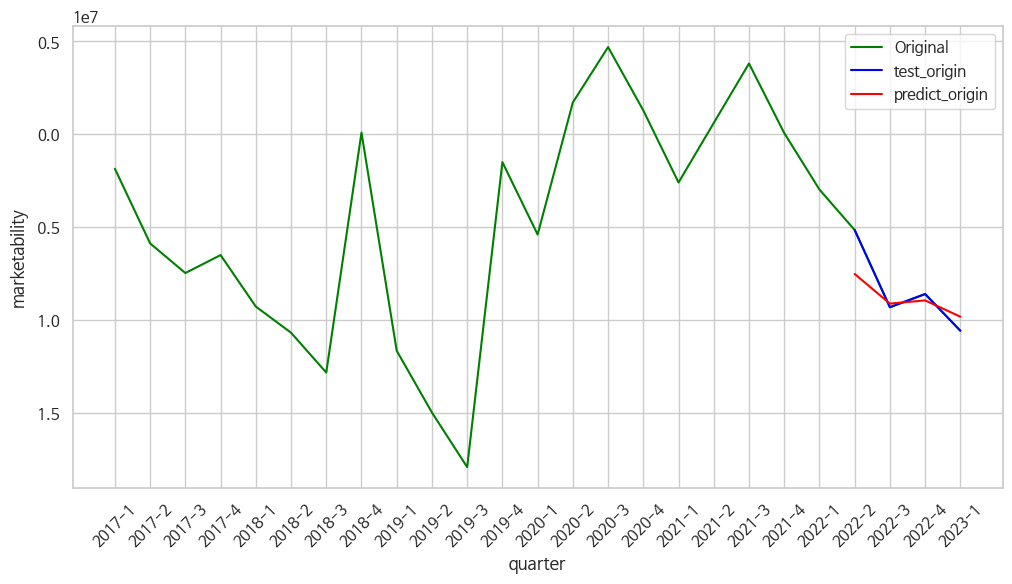

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.396076e+05
std      1.359264e+06
min     -7.544190e+05
25%     -3.335308e+05
50%      7.395423e+04
75%      8.470926e+05
max      2.364941e+06
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 29ms/step
[[0.35060808]]
--------------------------------------------------------------------------------
예측된 시장성  : -9979484.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_ilsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.681408e+09  1.000000 -1.850395e+06
1   8.174889e+09  0.941655 -5.865219e+06
2   8.199880e+09  1.003057 -7.460785e+06
3   8.755332e+09  1.067739 -6.493758e+06
4   8.389539e+09  0.958221 -9.263533e+06
5   8.585575e+09  1.023367 -1.067136e+07
6   8.004013e+09  0.932263 -1.281395e+07
7   1.461251e+10  1.825648  9.582065e+04
8   6.957890e+09  0.476160 -1.164273e+07
9   6.034653e+09  0.867311 -1.496563e+07
10  6.108408e+09  1.012222 -1.790233e+07
11  9.378510e+09  1.535344 -1.494556e+06
12  7.521787e+09  0.802024 -5.389898e+06
13  8.950320e+09  1.189919  1.718173e+06
14  8.828673e+09  0.986409  4.695116e+06
15  8.980287e+09  1.017173  1.288684e+06
16  8.104548e+09  0.902482 -2.589373e+06
17  1.017731e+10  1.255753  6.146144e+05
18  9.071717e+09  0.891367  3.811884e+06
19  1.221998e+10  1.347042  7.259950e+04
20  9.837120e+09  0.805003 -2.968533e+06
21  1.222009e+10  1.242242 -5.145916e+06
22  1.108044e+10  0.906740 -9.299320e+06
23  1.241006e+10

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74324014 0.47709764 0.41203681]
 [0.24123105 0.38167273 0.32467756]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2189
Epoch 1: val_loss improved from inf to 0.40664, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2189 - val_loss: 0.4066
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2180
Epoch 2: val_loss improved from 0.40664 to 0.40516, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2180 - val_loss: 0.4052
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2171
Epoch 3: val_loss improved from 0.40516 to 0.40369, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2171 - val_loss: 0.4037
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2163
Epoch 4: val_loss improved from 0.40369 to 0.40222, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2163 - val_loss: 0.4022
Epoch 5/300
1/1 [=================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 647ms/step
[[0.5852579 ]
 [0.50047326]
 [0.51788586]
 [0.4583608 ]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.502708,0.585258
2022-3,0.437131,0.500473
2022-4,0.311442,0.517886
2023-1,0.430576,0.458361


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_ilsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.502708,0.585258,2.173913,3.112165,-0.938252
2022-3,0.437131,0.500473,1.428571,2.148511,-0.719940
2022-4,0.311442,0.517886,0.000000,2.346421,-2.346421
2023-1,0.430576,0.458361,1.354064,1.669865,-0.315801


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


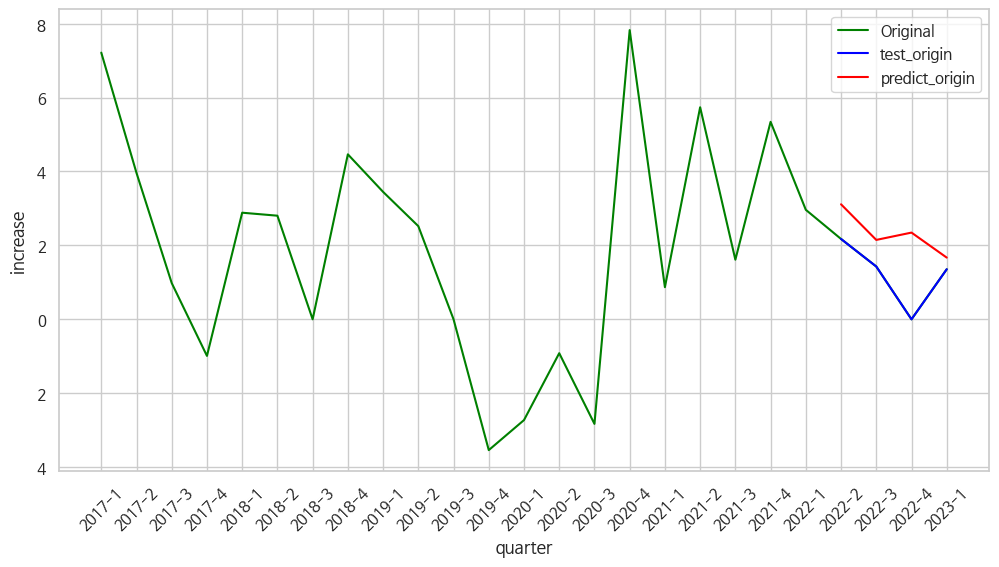

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.080104
std      0.882715
min     -2.346421
25%     -1.290295
50%     -0.829096
75%     -0.618905
max     -0.315801
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.45513612]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.6332131624221802 


### 추가


In [122]:
ap_ilsik.loc[25] = ['2023-2', '일식음식점수리리', sales, growth, increase, marketability]

<ipython-input-122-77f98d7802c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_ilsik.loc[25] = ['2023-2', '일식음식점수리리', sales, growth, increase, marketability]


In [123]:
ap_ilsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일식음식점,8.681408e+09,1.000000,7.216495,-1.850395e+06
1,2017-2,일식음식점,8.174889e+09,0.941655,3.960396,-5.865219e+06
2,2017-3,일식음식점,8.199880e+09,1.003057,0.980392,-7.460785e+06
3,2017-4,일식음식점,8.755332e+09,1.067739,-0.990099,-6.493758e+06
4,2018-1,일식음식점,8.389539e+09,0.958221,2.884615,-9.263533e+06
5,2018-2,일식음식점,8.585575e+09,1.023367,2.803738,-1.067136e+07
6,2018-3,일식음식점,8.004013e+09,0.932263,0.000000,-1.281395e+07
7,2018-4,일식음식점,1.461251e+10,1.825648,4.464286,9.582065e+04
8,2019-1,일식음식점,6.957890e+09,0.476160,3.448276,-1.164273e+07
9,2019-2,일식음식점,6.034653e+09,0.867311,2.521008,-1.496563e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_ilsik[['성장성', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.850395e+06  7.216495
1   0.941655 -5.865219e+06  3.960396
2   1.003057 -7.460785e+06  0.980392
3   1.067739 -6.493758e+06 -0.990099
4   0.958221 -9.263533e+06  2.884615
5   1.023367 -1.067136e+07  2.803738
6   0.932263 -1.281395e+07  0.000000
7   1.825648  9.582065e+04  4.464286
8   0.476160 -1.164273e+07  3.448276
9   0.867311 -1.496563e+07  2.521008
10  1.012222 -1.790233e+07  0.000000
11  1.535344 -1.494556e+06 -3.539823
12  0.802024 -5.389898e+06 -2.727273
13  1.189919  1.718173e+06 -0.917431
14  0.986409  4.695116e+06 -2.830189
15  1.017173  1.288684e+06  7.826087
16  0.902482 -2.589373e+06  0.869565
17  1.255753  6.146144e+05  5.737705
18  0.891367  3.811884e+06  1.612903
19  1.347042  7.259950e+04  5.343511
20  0.805003 -2.968533e+06  2.962963
21  1.242242 -5.145916e+06  2.173913
22  0.906740 -9.299320e+06  1.428571
23  1.119997 -8.591352e+06  0.000000
24  0.991223 -1.056545e+07  1.354064
25  0.965034 -9.979484e+06  1.633213
-

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.38167273 0.32467756 0.43057588]
 [0.36226654 0.3506081  0.45513612]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1544
Epoch 1: val_loss improved from inf to 0.27212, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1544 - val_loss: 0.2721
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1538
Epoch 2: val_loss improved from 0.27212 to 0.27077, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1538 - val_loss: 0.2708
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1531
Epoch 3: val_loss improved from 0.27077 to 0.26943, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.1531 - val_loss: 0.2694
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1524
Epoch 4: val_loss improved from 0.26943 to 0.26810, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.1524 - val_loss: 0.2681
Epoch 5/300
1/1 [================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 937ms/step
[[0.27592272]
 [0.278653  ]
 [0.24755722]
 [0.25065652]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.588234,0.275923
2022-4,0.743240,0.278653
2023-1,0.241231,0.247557
2023-2,0.239799,0.250657


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_ilsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.588234,0.275923,1.108044e+10,8.401479e+09,2.678958e+09
2022-4,0.743240,0.278653,1.241006e+10,8.424899e+09,3.985161e+09
2023-1,0.241231,0.247557,8.103899e+09,8.158163e+09,-5.426483e+07
2023-2,0.239799,0.250657,8.091619e+09,8.184749e+09,-9.313024e+07


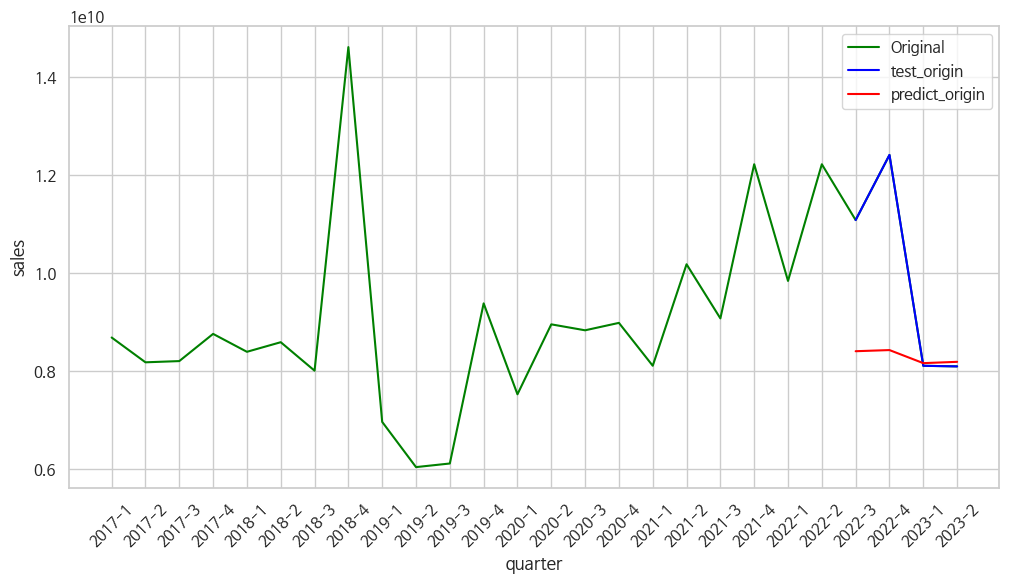

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.629181e+09
std      2.037402e+09
min     -9.313024e+07
25%     -6.398118e+07
50%      1.312347e+09
75%      3.005509e+09
max      3.985161e+09
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 29ms/step
[[0.25165164]]
--------------------------------------------------------------------------------
예측된 매출  : 8193285120.0 


### 성장성

In [136]:
X = ap_ilsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.681408e+09 -1.850395e+06  7.216495
1   8.174889e+09 -5.865219e+06  3.960396
2   8.199880e+09 -7.460785e+06  0.980392
3   8.755332e+09 -6.493758e+06 -0.990099
4   8.389539e+09 -9.263533e+06  2.884615
5   8.585575e+09 -1.067136e+07  2.803738
6   8.004013e+09 -1.281395e+07  0.000000
7   1.461251e+10  9.582065e+04  4.464286
8   6.957890e+09 -1.164273e+07  3.448276
9   6.034653e+09 -1.496563e+07  2.521008
10  6.108408e+09 -1.790233e+07  0.000000
11  9.378510e+09 -1.494556e+06 -3.539823
12  7.521787e+09 -5.389898e+06 -2.727273
13  8.950320e+09  1.718173e+06 -0.917431
14  8.828673e+09  4.695116e+06 -2.830189
15  8.980287e+09  1.288684e+06  7.826087
16  8.104548e+09 -2.589373e+06  0.869565
17  1.017731e+10  6.146144e+05  5.737705
18  9.071717e+09  3.811884e+06  1.612903
19  1.221998e+10  7.259950e+04  5.343511
20  9.837120e+09 -2.968533e+06  2.962963
21  1.222009e+10 -5.145916e+06  2.173913
22  1.108044e+10 -9.299320e+06  1.428571
23  1.241006e+10

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24123105 0.32467756 0.43057588]
 [0.23979948 0.3506081  0.45513612]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2648
Epoch 1: val_loss improved from inf to 0.23899, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2648 - val_loss: 0.2390
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2638
Epoch 2: val_loss improved from 0.23899 to 0.23774, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2638 - val_loss: 0.2377
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2629
Epoch 3: val_loss improved from 0.23774 to 0.23649, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2629 - val_loss: 0.2365
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2620
Epoch 4: val_loss improved from 0.23649 to 0.23525, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2620 - val_loss: 0.2353
Epoch 5/300
1/1 [=================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 624ms/step
[[0.44317305]
 [0.42600915]
 [0.3849152 ]
 [0.36598635]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.319069,0.443173
2022-4,0.477098,0.426009
2023-1,0.381673,0.384915
2023-2,0.362267,0.365986


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 3].values       # 성장성이 ap_ilsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.319069,0.443173,0.906740,1.074217,-0.167477
2022-4,0.477098,0.426009,1.119997,1.051054,0.068943
2023-1,0.381673,0.384915,0.991223,0.995598,-0.004376
2023-2,0.362267,0.365986,0.965034,0.970054,-0.005020


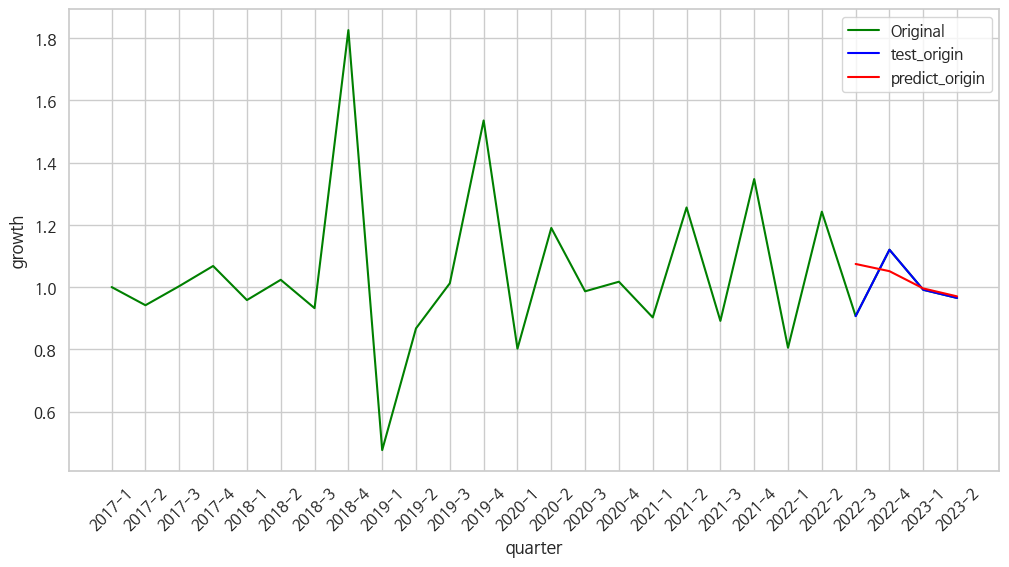

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.026982
std      0.099890
min     -0.167477
25%     -0.045634
50%     -0.004698
75%      0.013954
max      0.068943
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.35035464]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9489591717720032 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_ilsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.681408e+09  1.000000  7.216495
1   8.174889e+09  0.941655  3.960396
2   8.199880e+09  1.003057  0.980392
3   8.755332e+09  1.067739 -0.990099
4   8.389539e+09  0.958221  2.884615
5   8.585575e+09  1.023367  2.803738
6   8.004013e+09  0.932263  0.000000
7   1.461251e+10  1.825648  4.464286
8   6.957890e+09  0.476160  3.448276
9   6.034653e+09  0.867311  2.521008
10  6.108408e+09  1.012222  0.000000
11  9.378510e+09  1.535344 -3.539823
12  7.521787e+09  0.802024 -2.727273
13  8.950320e+09  1.189919 -0.917431
14  8.828673e+09  0.986409 -2.830189
15  8.980287e+09  1.017173  7.826087
16  8.104548e+09  0.902482  0.869565
17  1.017731e+10  1.255753  5.737705
18  9.071717e+09  0.891367  1.612903
19  1.221998e+10  1.347042  5.343511
20  9.837120e+09  0.805003  2.962963
21  1.222009e+10  1.242242  2.173913
22  1.108044e+10  0.906740  1.428571
23  1.241006e+10  1.119997  0.000000
24  8.103899e+09  0.991223  1.354064
25  8.091619e+09  0.965034  1.633213
-

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24123105 0.38167273 0.43057588]
 [0.23979948 0.36226654 0.45513612]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2783
Epoch 1: val_loss improved from inf to 0.68269, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2783 - val_loss: 0.6827
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2774
Epoch 2: val_loss improved from 0.68269 to 0.68089, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2774 - val_loss: 0.6809
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2764
Epoch 3: val_loss improved from 0.68089 to 0.67910, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2764 - val_loss: 0.6791
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2754
Epoch 4: val_loss improved from 0.67910 to 0.67731, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2754 - val_loss: 0.6773
Epoch 5/300
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 934ms/step
[[0.4209239 ]
 [0.44590428]
 [0.3997251 ]
 [0.3983716 ]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.380707,0.420924
2022-4,0.412037,0.445904
2023-1,0.324678,0.399725
2023-2,0.350608,0.398372


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 5].values       # 시장성이 ap_ilsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.380707,0.420924,-9.299320e+06,-8390526.0,-9.087937e+05
2022-4,0.412037,0.445904,-8.591352e+06,-7826033.5,-7.653183e+05
2023-1,0.324678,0.399725,-1.056545e+07,-8869565.0,-1.695883e+06
2023-2,0.350608,0.398372,-9.979484e+06,-8900150.0,-1.079334e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


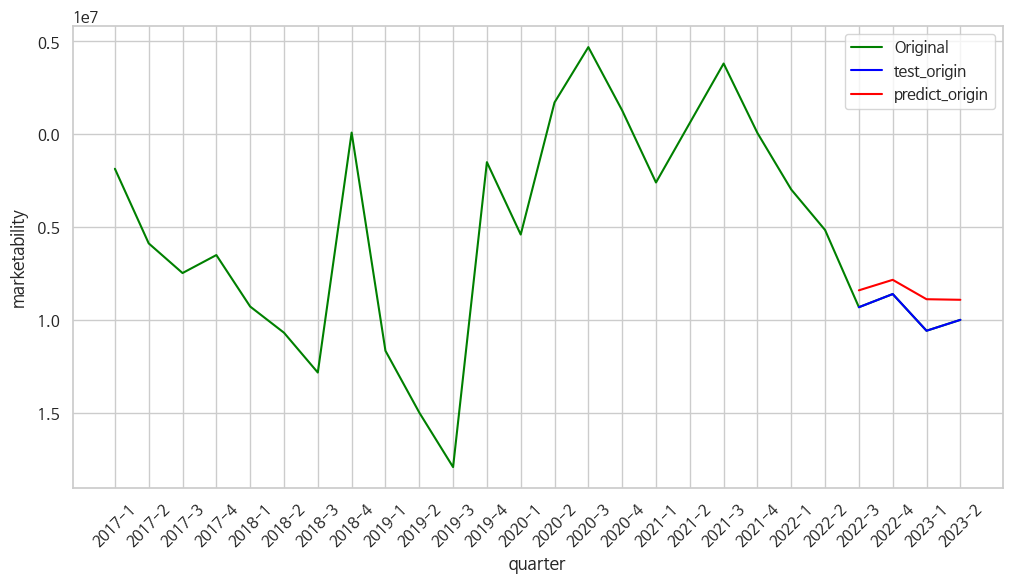

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.112332e+06
std      4.096612e+05
min     -1.695883e+06
25%     -1.233471e+06
50%     -9.940639e+05
75%     -8.729249e+05
max     -7.653183e+05
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 30ms/step
[[0.37428987]]
--------------------------------------------------------------------------------
예측된 시장성  : -9444336.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_ilsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.681408e+09  1.000000 -1.850395e+06
1   8.174889e+09  0.941655 -5.865219e+06
2   8.199880e+09  1.003057 -7.460785e+06
3   8.755332e+09  1.067739 -6.493758e+06
4   8.389539e+09  0.958221 -9.263533e+06
5   8.585575e+09  1.023367 -1.067136e+07
6   8.004013e+09  0.932263 -1.281395e+07
7   1.461251e+10  1.825648  9.582065e+04
8   6.957890e+09  0.476160 -1.164273e+07
9   6.034653e+09  0.867311 -1.496563e+07
10  6.108408e+09  1.012222 -1.790233e+07
11  9.378510e+09  1.535344 -1.494556e+06
12  7.521787e+09  0.802024 -5.389898e+06
13  8.950320e+09  1.189919  1.718173e+06
14  8.828673e+09  0.986409  4.695116e+06
15  8.980287e+09  1.017173  1.288684e+06
16  8.104548e+09  0.902482 -2.589373e+06
17  1.017731e+10  1.255753  6.146144e+05
18  9.071717e+09  0.891367  3.811884e+06
19  1.221998e+10  1.347042  7.259950e+04
20  9.837120e+09  0.805003 -2.968533e+06
21  1.222009e+10  1.242242 -5.145916e+06
22  1.108044e+10  0.906740 -9.299320e+06
23  1.241006e+10

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24123105 0.38167273 0.32467756]
 [0.23979948 0.36226654 0.3506081 ]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2064
Epoch 1: val_loss improved from inf to 0.43349, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2064 - val_loss: 0.4335
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2055
Epoch 2: val_loss improved from 0.43349 to 0.43190, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2055 - val_loss: 0.4319
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2046
Epoch 3: val_loss improved from 0.43190 to 0.43032, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2046 - val_loss: 0.4303
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2038
Epoch 4: val_loss improved from 0.43032 to 0.42874, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2038 - val_loss: 0.4287
Epoch 5/300
1/1 [=================

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 654ms/step
[[0.46779117]
 [0.4836455 ]
 [0.4303134 ]
 [0.42609018]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.437131,0.467791
2022-4,0.311442,0.483645
2023-1,0.430576,0.430313
2023-2,0.455136,0.426090


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_ilsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.437131,0.467791,1.428571,1.777049,-0.348478
2022-4,0.311442,0.483645,0.000000,1.957248,-1.957248
2023-1,0.430576,0.430313,1.354064,1.351080,0.002983
2023-2,0.455136,0.426090,1.633213,1.303080,0.330134


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


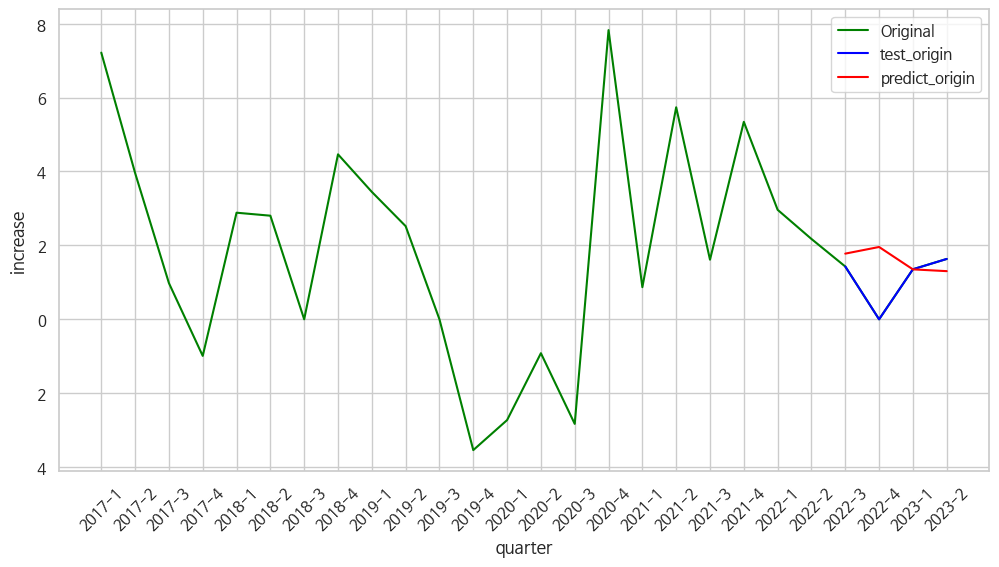

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.493152
std      1.014636
min     -1.957248
25%     -0.750671
50%     -0.172747
75%      0.084771
max      0.330134
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.33610278]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.28029096126556396 


### 추가

In [172]:
ap_ilsik.loc[26] = ['2023-3', '일식음식점', sales, growth, increase, marketability]

<ipython-input-172-f9f6715e6f4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_ilsik.loc[26] = ['2023-3', '일식음식점', sales, growth, increase, marketability]


In [173]:
ap_ilsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일식음식점,8.681408e+09,1.000000,7.216495,-1.850395e+06
1,2017-2,일식음식점,8.174889e+09,0.941655,3.960396,-5.865219e+06
2,2017-3,일식음식점,8.199880e+09,1.003057,0.980392,-7.460785e+06
3,2017-4,일식음식점,8.755332e+09,1.067739,-0.990099,-6.493758e+06
4,2018-1,일식음식점,8.389539e+09,0.958221,2.884615,-9.263533e+06
5,2018-2,일식음식점,8.585575e+09,1.023367,2.803738,-1.067136e+07
6,2018-3,일식음식점,8.004013e+09,0.932263,0.000000,-1.281395e+07
7,2018-4,일식음식점,1.461251e+10,1.825648,4.464286,9.582065e+04
8,2019-1,일식음식점,6.957890e+09,0.476160,3.448276,-1.164273e+07
9,2019-2,일식음식점,6.034653e+09,0.867311,2.521008,-1.496563e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_ilsik[['성장성', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.850395e+06  7.216495
1   0.941655 -5.865219e+06  3.960396
2   1.003057 -7.460785e+06  0.980392
3   1.067739 -6.493758e+06 -0.990099
4   0.958221 -9.263533e+06  2.884615
5   1.023367 -1.067136e+07  2.803738
6   0.932263 -1.281395e+07  0.000000
7   1.825648  9.582065e+04  4.464286
8   0.476160 -1.164273e+07  3.448276
9   0.867311 -1.496563e+07  2.521008
10  1.012222 -1.790233e+07  0.000000
11  1.535344 -1.494556e+06 -3.539823
12  0.802024 -5.389898e+06 -2.727273
13  1.189919  1.718173e+06 -0.917431
14  0.986409  4.695116e+06 -2.830189
15  1.017173  1.288684e+06  7.826087
16  0.902482 -2.589373e+06  0.869565
17  1.255753  6.146144e+05  5.737705
18  0.891367  3.811884e+06  1.612903
19  1.347042  7.259950e+04  5.343511
20  0.805003 -2.968533e+06  2.962963
21  1.242242 -5.145916e+06  2.173913
22  0.906740 -9.299320e+06  1.428571
23  1.119997 -8.591352e+06  0.000000
24  0.991223 -1.056545e+07  1.354064
25  0.965034 -9.979484e+06  1.633213
2

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.36226654 0.3506081  0.45513612]
 [0.3503546  0.37428989 0.33610278]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1544
Epoch 1: val_loss improved from inf to 0.28462, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1544 - val_loss: 0.2846
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1538
Epoch 2: val_loss improved from 0.28462 to 0.28326, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1538 - val_loss: 0.2833
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1531
Epoch 3: val_loss improved from 0.28326 to 0.28189, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1531 - val_loss: 0.2819
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1524
Epoch 4: val_loss improved from 0.28189 to 0.28053, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1524 - val_loss: 0.2805
Epoch 5/300
1/1 [=================

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 652ms/step
[[0.27882192]
 [0.24777171]
 [0.25089395]
 [0.2518689 ]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.743240,0.278822
2023-1,0.241231,0.247772
2023-2,0.239799,0.250894
2023-3,0.251652,0.251869


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_ilsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.743240,0.278822,1.241006e+10,8.426348e+09,3.983713e+09
2023-1,0.241231,0.247772,8.103899e+09,8.160004e+09,-5.610496e+07
2023-2,0.239799,0.250894,8.091619e+09,8.186785e+09,-9.516646e+07
2023-3,0.251652,0.251869,8.193285e+09,8.195148e+09,-1.863168e+06


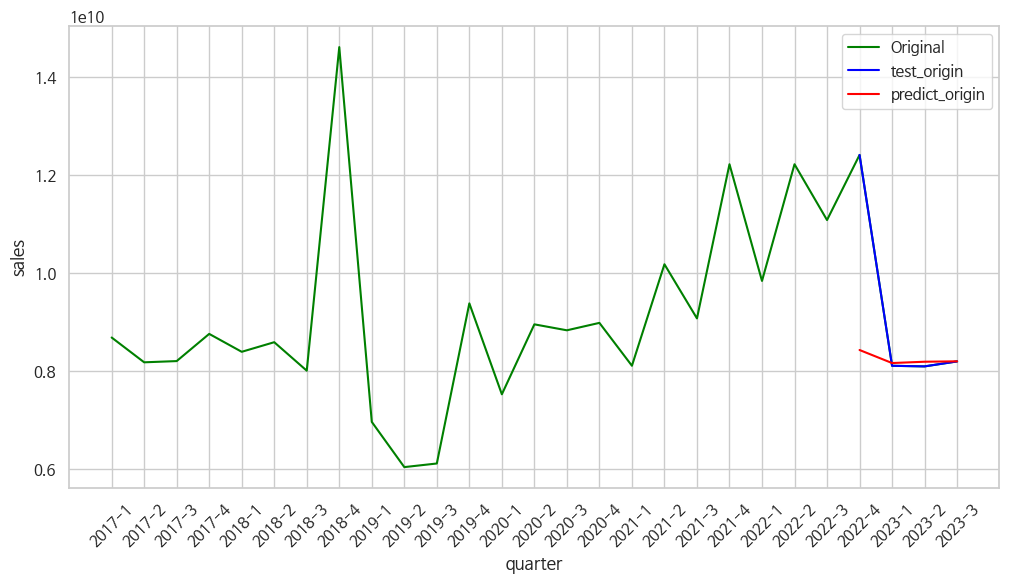

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.576445e+08
std      2.017741e+09
min     -9.516646e+07
25%     -6.587034e+07
50%     -2.898406e+07
75%      9.945308e+08
max      3.983713e+09
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.24745426]]
--------------------------------------------------------------------------------
예측된 매출  : 8157280768.0 


### 성장성

In [186]:
X = ap_ilsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.681408e+09 -1.850395e+06  7.216495
1   8.174889e+09 -5.865219e+06  3.960396
2   8.199880e+09 -7.460785e+06  0.980392
3   8.755332e+09 -6.493758e+06 -0.990099
4   8.389539e+09 -9.263533e+06  2.884615
5   8.585575e+09 -1.067136e+07  2.803738
6   8.004013e+09 -1.281395e+07  0.000000
7   1.461251e+10  9.582065e+04  4.464286
8   6.957890e+09 -1.164273e+07  3.448276
9   6.034653e+09 -1.496563e+07  2.521008
10  6.108408e+09 -1.790233e+07  0.000000
11  9.378510e+09 -1.494556e+06 -3.539823
12  7.521787e+09 -5.389898e+06 -2.727273
13  8.950320e+09  1.718173e+06 -0.917431
14  8.828673e+09  4.695116e+06 -2.830189
15  8.980287e+09  1.288684e+06  7.826087
16  8.104548e+09 -2.589373e+06  0.869565
17  1.017731e+10  6.146144e+05  5.737705
18  9.071717e+09  3.811884e+06  1.612903
19  1.221998e+10  7.259950e+04  5.343511
20  9.837120e+09 -2.968533e+06  2.962963
21  1.222009e+10 -5.145916e+06  2.173913
22  1.108044e+10 -9.299320e+06  1.428571
23  1.241006e+10

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23979948 0.3506081  0.45513612]
 [0.25165166 0.37428989 0.33610278]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2648
Epoch 1: val_loss improved from inf to 0.22620, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2648 - val_loss: 0.2262
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2638
Epoch 2: val_loss improved from 0.22620 to 0.22499, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2638 - val_loss: 0.2250
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2629
Epoch 3: val_loss improved from 0.22499 to 0.22378, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2629 - val_loss: 0.2238
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2620
Epoch 4: val_loss improved from 0.22378 to 0.22258, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2620 - val_loss: 0.2226
Epoch 5/300
1/1 [=================

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 622ms/step
[[0.4126538 ]
 [0.37293926]
 [0.35439044]
 [0.3382191 ]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.477098,0.412654
2023-1,0.381673,0.372939
2023-2,0.362267,0.354390
2023-3,0.350355,0.338219


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 3].values       # 성장성이 ap_ilsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.477098,0.412654,1.119997,1.033031,0.086966
2023-1,0.381673,0.372939,0.991223,0.979437,0.011786
2023-2,0.362267,0.354390,0.965034,0.954405,0.010629
2023-3,0.350355,0.338219,0.948959,0.932582,0.016377


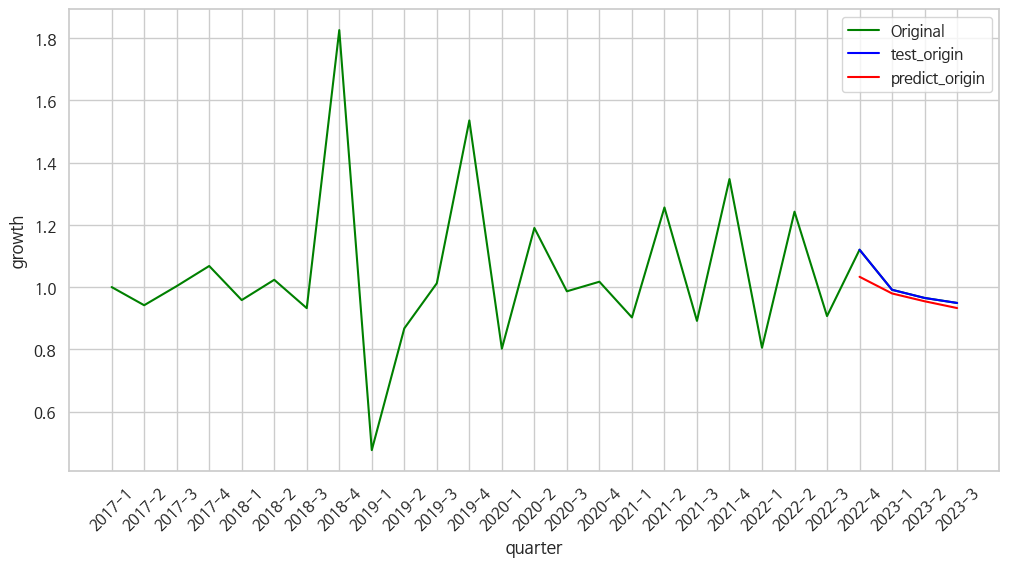

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.031439
std      0.037101
min      0.010629
25%      0.011496
50%      0.014081
75%      0.034024
max      0.086966
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.33472392]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.927865743637085 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_ilsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.681408e+09  1.000000  7.216495
1   8.174889e+09  0.941655  3.960396
2   8.199880e+09  1.003057  0.980392
3   8.755332e+09  1.067739 -0.990099
4   8.389539e+09  0.958221  2.884615
5   8.585575e+09  1.023367  2.803738
6   8.004013e+09  0.932263  0.000000
7   1.461251e+10  1.825648  4.464286
8   6.957890e+09  0.476160  3.448276
9   6.034653e+09  0.867311  2.521008
10  6.108408e+09  1.012222  0.000000
11  9.378510e+09  1.535344 -3.539823
12  7.521787e+09  0.802024 -2.727273
13  8.950320e+09  1.189919 -0.917431
14  8.828673e+09  0.986409 -2.830189
15  8.980287e+09  1.017173  7.826087
16  8.104548e+09  0.902482  0.869565
17  1.017731e+10  1.255753  5.737705
18  9.071717e+09  0.891367  1.612903
19  1.221998e+10  1.347042  5.343511
20  9.837120e+09  0.805003  2.962963
21  1.222009e+10  1.242242  2.173913
22  1.108044e+10  0.906740  1.428571
23  1.241006e+10  1.119997  0.000000
24  8.103899e+09  0.991223  1.354064
25  8.091619e+09  0.965034  1.633213
2

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23979948 0.36226654 0.45513612]
 [0.25165166 0.3503546  0.33610278]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2783
Epoch 1: val_loss improved from inf to 0.62499, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2783 - val_loss: 0.6250
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2774
Epoch 2: val_loss improved from 0.62499 to 0.62329, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.2774 - val_loss: 0.6233
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2764
Epoch 3: val_loss improved from 0.62329 to 0.62159, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.2764 - val_loss: 0.6216
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2754
Epoch 4: val_loss improved from 0.62159 to 0.61989, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2754 - val_loss: 0.6199
Epoch 5/300
1/1 [===============

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.44590428]
 [0.3997251 ]
 [0.3983716 ]
 [0.37428987]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.412037,0.445904
2023-1,0.324678,0.399725
2023-2,0.350608,0.398372
2023-3,0.374290,0.374290


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 5].values       # 시장성이 ap_ilsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.412037,0.445904,-8.591352e+06,-7826033.5,-7.653183e+05
2023-1,0.324678,0.399725,-1.056545e+07,-8869565.0,-1.695883e+06
2023-2,0.350608,0.398372,-9.979484e+06,-8900150.0,-1.079334e+06
2023-3,0.374290,0.374290,-9.444336e+06,-9444336.0,0.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


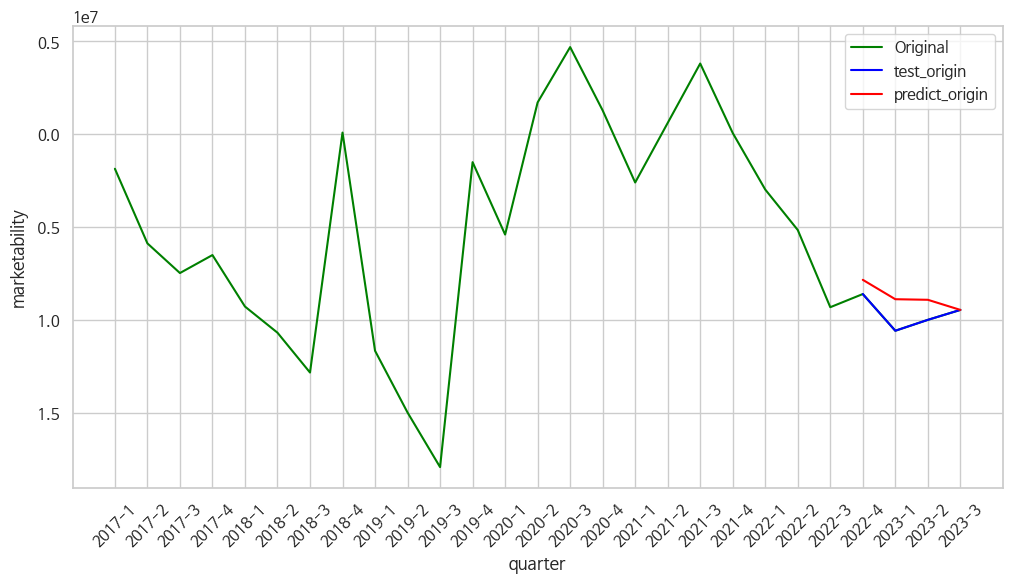

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -8.851338e+05
std      7.054185e+05
min     -1.695883e+06
25%     -1.233471e+06
50%     -9.223262e+05
75%     -5.739887e+05
max      0.000000e+00
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.3664738]]
--------------------------------------------------------------------------------
예측된 시장성  : -9620960.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_ilsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_ilsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.681408e+09  1.000000 -1.850395e+06
1   8.174889e+09  0.941655 -5.865219e+06
2   8.199880e+09  1.003057 -7.460785e+06
3   8.755332e+09  1.067739 -6.493758e+06
4   8.389539e+09  0.958221 -9.263533e+06
5   8.585575e+09  1.023367 -1.067136e+07
6   8.004013e+09  0.932263 -1.281395e+07
7   1.461251e+10  1.825648  9.582065e+04
8   6.957890e+09  0.476160 -1.164273e+07
9   6.034653e+09  0.867311 -1.496563e+07
10  6.108408e+09  1.012222 -1.790233e+07
11  9.378510e+09  1.535344 -1.494556e+06
12  7.521787e+09  0.802024 -5.389898e+06
13  8.950320e+09  1.189919  1.718173e+06
14  8.828673e+09  0.986409  4.695116e+06
15  8.980287e+09  1.017173  1.288684e+06
16  8.104548e+09  0.902482 -2.589373e+06
17  1.017731e+10  1.255753  6.146144e+05
18  9.071717e+09  0.891367  3.811884e+06
19  1.221998e+10  1.347042  7.259950e+04
20  9.837120e+09  0.805003 -2.968533e+06
21  1.222009e+10  1.242242 -5.145916e+06
22  1.108044e+10  0.906740 -9.299320e+06
23  1.241006e+10

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23979948 0.36226654 0.3506081 ]
 [0.25165166 0.3503546  0.37428989]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2064
Epoch 1: val_loss improved from inf to 0.40896, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2064 - val_loss: 0.4090
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2055
Epoch 2: val_loss improved from 0.40896 to 0.40742, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2055 - val_loss: 0.4074
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2046
Epoch 3: val_loss improved from 0.40742 to 0.40589, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2046 - val_loss: 0.4059
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2038
Epoch 4: val_loss improved from 0.40589 to 0.40436, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.2038 - val_loss: 0.4044
Epoch 5/300
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 626ms/step
[[0.4836455 ]
 [0.4303134 ]
 [0.42609018]
 [0.33610278]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.311442,0.483645
2023-1,0.430576,0.430313
2023-2,0.455136,0.426090
2023-3,0.336103,0.336103


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_ilsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.311442,0.483645,0.000000,1.957248,-1.957248
2023-1,0.430576,0.430313,1.354064,1.351080,0.002983
2023-2,0.455136,0.426090,1.633213,1.303080,0.330134
2023-3,0.336103,0.336103,0.280291,0.280291,0.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


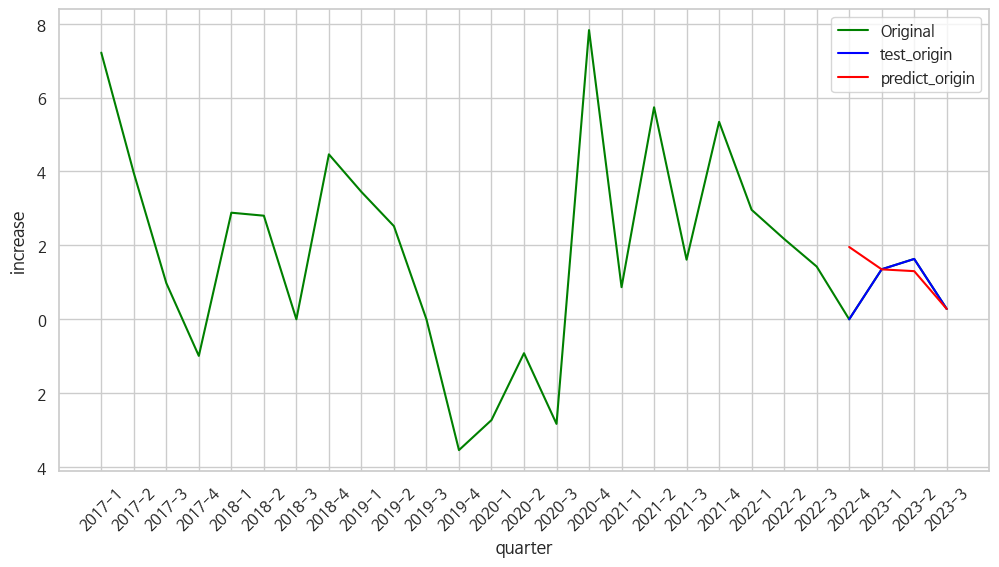

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_ilsik['분기'], ap_ilsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.406033
std      1.045684
min     -1.957248
25%     -0.489312
50%      0.001492
75%      0.084771
max      0.330134
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 20ms/step
[[0.3407873]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.3335346579551697 


### 추가

In [222]:
ap_ilsik.loc[27] = ['2023-4', '일식음식점', sales, growth, increase, marketability]

<ipython-input-222-a8b3b3fbb4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_ilsik.loc[27] = ['2023-4', '일식음식점', sales, growth, increase, marketability]


In [223]:
final_ap_ilsik = ap_ilsik
final_ap_ilsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일식음식점,8.681408e+09,1.000000,7.216495,-1.850395e+06
1,2017-2,일식음식점,8.174889e+09,0.941655,3.960396,-5.865219e+06
2,2017-3,일식음식점,8.199880e+09,1.003057,0.980392,-7.460785e+06
3,2017-4,일식음식점,8.755332e+09,1.067739,-0.990099,-6.493758e+06
4,2018-1,일식음식점,8.389539e+09,0.958221,2.884615,-9.263533e+06
5,2018-2,일식음식점,8.585575e+09,1.023367,2.803738,-1.067136e+07
6,2018-3,일식음식점,8.004013e+09,0.932263,0.000000,-1.281395e+07
7,2018-4,일식음식점,1.461251e+10,1.825648,4.464286,9.582065e+04
8,2019-1,일식음식점,6.957890e+09,0.476160,3.448276,-1.164273e+07
9,2019-2,일식음식점,6.034653e+09,0.867311,2.521008,-1.496563e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_ilsik[['성장성', '시장성', '순점포증감률']]
y = ap_ilsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.850395e+06  7.216495
1   0.941655 -5.865219e+06  3.960396
2   1.003057 -7.460785e+06  0.980392
3   1.067739 -6.493758e+06 -0.990099
4   0.958221 -9.263533e+06  2.884615
5   1.023367 -1.067136e+07  2.803738
6   0.932263 -1.281395e+07  0.000000
7   1.825648  9.582065e+04  4.464286
8   0.476160 -1.164273e+07  3.448276
9   0.867311 -1.496563e+07  2.521008
10  1.012222 -1.790233e+07  0.000000
11  1.535344 -1.494556e+06 -3.539823
12  0.802024 -5.389898e+06 -2.727273
13  1.189919  1.718173e+06 -0.917431
14  0.986409  4.695116e+06 -2.830189
15  1.017173  1.288684e+06  7.826087
16  0.902482 -2.589373e+06  0.869565
17  1.255753  6.146144e+05  5.737705
18  0.891367  3.811884e+06  1.612903
19  1.347042  7.259950e+04  5.343511
20  0.805003 -2.968533e+06  2.962963
21  1.242242 -5.145916e+06  2.173913
22  0.906740 -9.299320e+06  1.428571
23  1.119997 -8.591352e+06  0.000000
24  0.991223 -1.056545e+07  1.354064
25  0.965034 -9.979484e+06  1.633213
2

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.3503546  0.37428989 0.33610278]
 [0.33472391 0.36647378 0.34078729]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1524
Epoch 1: val_loss improved from inf to 0.33636, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1524 - val_loss: 0.3364
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1517
Epoch 2: val_loss improved from 0.33636 to 0.33487, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.1517 - val_loss: 0.3349
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1510
Epoch 3: val_loss improved from 0.33487 to 0.33338, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.1510 - val_loss: 0.3334
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1504
Epoch 4: val_loss improved from 0.33338 to 0.33190, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1504 - val_loss: 0.3319
Epoch 5/300
1/1 [===============

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 661ms/step
[[0.25457862]
 [0.25774795]
 [0.2573061 ]
 [0.2535397 ]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_ilsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.241231,0.254579
2023-2,0.239799,0.257748
2023-3,0.251652,0.257306
2023-4,0.247454,0.253540


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_ilsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_ilsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.241231,0.254579,8.103899e+09,8.218392e+09,-114493440.0
2023-2,0.239799,0.257748,8.091619e+09,8.245578e+09,-153959424.0
2023-3,0.251652,0.257306,8.193285e+09,8.241788e+09,-48502784.0
2023-4,0.247454,0.253540,8.157281e+09,8.209481e+09,-52199936.0


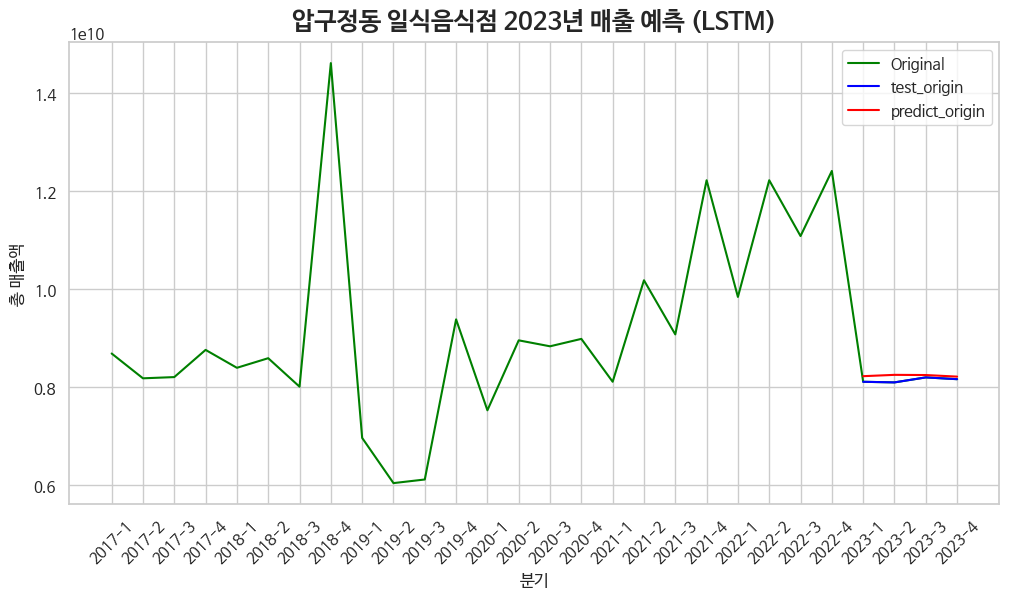

In [235]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 일식음식점 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_ilsik['분기'], ap_ilsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()